# Observation of Saltwater Marsh Resiliency to Sea Level Rise in Jamaica Bay, Long Islands Oyster and Great South Bay: 1995 / 1996 to 2019


#### Abstract
It is hypothesized that the acceleration of sea level rise and increased frequency of storm events 
are influencing the disappearance of marsh island vegetation in Long Island’s South Shore Estuary. This 
study uses a color image analysis to visualize the disappearance of marsh vegetation density in specific 
locations throughout Long Island’s South Bay from 1996 to 2019. Landsat 8 and 5 NDVI satelite image data 
is then ploted and exported to be compared to sea level rise in R.  

### To start import all libraries needed.

In [90]:
import ee
import geemap
import folium
import numpy as np
import pandas as pd
import geopandas as gdp


#for tutorial from: https://developers.google.com/earth-engine/tutorials/community/detecting-changes-in-sentinel-1-imagery-pt-1#run_me_first
import matplotlib.pyplot as plt
from scipy.stats import norm, gamma, f, chi2
import IPython.display as disp
%matplotlib inline

 
#import geemap.eefolium as geemap #Use this if you are using Google colab

##### You must have a Google Earth Engine account to access the Earth Engine API for python and satellite imagery. Use ee.Authenticate to 
##### get a one time code and access your acount.

In [109]:
#ee.Authenticate();

### Create a color composite image to vizualize the spatio temporal changes in marsh vegetation density from 1996 to 2019

##### 1.) First call Geemap to have a place to map your satellite images.
##### 2.) Then call three satellite images. One from 1996, 2000 and 2019
##### 3.) Use the .normalizedDifference() function to map the NDVI bands on to each image.
##### 4.) Landsat 8 NDVI band are B5 and B4 while Landsat 5 NDVI bands are B4 and B3
##### 5.) Once you have extracted the three NDVI images from the multispectral images,
##### 6.) stack the ndvi19, ndvi00 ,and the ndvi_96 images to create once final color composite image.
##### 7.) Finally use the Tiger feature collection to get clip the satellite images to the shape of NY state.






Stacking the ndvi images in this order makes the ndvi19 image red, the ndvi00 image green, and the ndvi_96 image blue.Therefore, any vegetation present on the color composite image that is red will be from the 2019 image. Any vegetation in the color composit image that is green will be from the 2000 image and vegetation that is blue will be from the 1996 image. Additionally, any area that is cyan or teal represents vegetation from the 2000 and 1996 images. 




In [113]:
Map = geemap.Map()
Map

#SECOND COLOR COMPOSITE IMAGE WITH NEW IMAGE

JB2019 = ee.Image("LANDSAT/LC08/C01/T1_TOA/LC08_013032_20190729");
ndvi19 = JB2019.normalizedDifference(['B5', 'B4']).rename('NDVI19');

JB2000 = ee.Image('LANDSAT/LT05/C01/T1_TOA/LT05_013032_20000825');
ndvi00 = JB2000.normalizedDifference(['B4', 'B3']).rename('NDVI00');

JB1996 = ee.Image('LANDSAT/LT05/C01/T1_TOA/LT05_013032_19960627');
ndvi_96 = JB1996.normalizedDifference(['B4', 'B3']).rename('NDVI96');

stacked_composite_2 = ndvi19.addBands(ndvi00).addBands(ndvi_96);
# print (stacked_composite_2, 'stacked_composite_2');



# Define vizual parameters for color composite image

vizparams_stack_2 = { 'min': 0, 'max': 1, 'bands': ['NDVI19', 'NDVI00', 'NDVI96']};

#Read in Tiger feature collection to get state shape

states = ee.FeatureCollection('TIGER/2016/States');
# print(states,'states')

## Get only ny state. and clip composite image to feature

nystate =  states.filter(ee.Filter.eq('STATEFP', '36'));
NYCLI_NDVI_clip = stacked_composite_2.clip(nystate);

# ## Display the state

Map.setCenter(-73.4766, 40.7759, 8.5);
Map.addLayer(nystate, {'color': 'gray'}, 'NY');
Map.addLayer(NYCLI_NDVI_clip, vizparams_stack_2, 'NYC LI NDVI Image clip' ); 
# print('NYCLI_NDVI_clip', NYCLI_NDVI_clip);

Map.addLayerControl()
#geemap.basemap.add_basemap(basemap = 'SATELLITE')
Map;

![image](./GEEMap1.JPG)

#### Extract NDVI values from red, cyan and deep blue vegetation sites  in Queens, Oyster Bay, and the Great South Bay in Long Island.

NDVI is a measure of the density of vegetation on the earth’s surface, with barren land at less than or equal to 0.1 and dense forest at greater than or equal to 0.6 [(USGS,n.d)](https://www.usgs.gov/core-science-systems/eros/phenology/science/ndvi-foundation-remote-sensing-phenology?qt-science_center_objects=0#qt-science_center_objects).

Here we will verify if the different color vegetation on the color composite image is really from the suspected dates. For example, if the blue regions on the map truly represents vegetation existing only in 1996 then we will get a dataframe showing NDVI vaule greater than or equal to 0.2 from 1995 to 1996 and decreasing NDVI value after the year 1996.     

To do this we must first create three regions of interest (ROI), one red, one cyan and one blue, for each location, Jamica Bay, Oyster Bay, the Great South Bay.  


In [111]:
JB_ROI2019_Red = ee.Geometry.Polygon(
        [[[-73.83817866901431, 40.61239641544904],
          [-73.84010985950503, 40.611712266675056],
          [-73.84071067432437, 40.61093037378465],
          [-73.83980945209537, 40.611028110896285],
          [-73.83877948383365, 40.61187515987567]]])

Map.addLayer(JB_ROI2019_Red, {"color": "#ff0023"})

JB_ROI1995_Blue = ee.Geometry.Polygon(
        [[[-73.79955485919986, 40.62370014529743],
          [-73.80067065815005, 40.62324412405964],
          [-73.80127147296939, 40.62210405734391],
          [-73.80092815021548, 40.62067080300779],
          [-73.79989818195376, 40.62216920453758]]])

Map.addLayer(JB_ROI1995_Blue, {"color": "#6fdbff"})

JBcyan = ee.Geometry.Polygon(
        [[[-73.85642654232063, 40.62754275563824],
          [-73.85666258113538, 40.62583275027443],
          [-73.85625488094368, 40.62526274949528],
          [-73.8538087063221, 40.62425300762098],
          [-73.85445243648567, 40.62242891908781],
          [-73.85621196559944, 40.62200546283967],
          [-73.85531074337044, 40.62102824586757],
          [-73.85378724410347, 40.62049078259097],
          [-73.85192043117561, 40.62066992939575],
          [-73.85241934448032, 40.621923993357974],
          [-73.85253202552926, 40.623438641314806],
          [-73.84958157531354, 40.62477411434126],
          [-73.84960300258675, 40.62637019077213],
          [-73.85140544704475, 40.62555589750268],
          [-73.85376579097786, 40.62799874752632]]])
Map.addLayer(JBcyan, {"color": "#11958c"})

SOB_ROI2019_Red = ee.Geometry.Polygon(
        [[[-73.49383721645214, 40.62426527394617],
          [-73.49458108416516, 40.62370068021003],
          [-73.49498162650494, 40.62317951283115],
          [-73.49423776141126, 40.6228103498127],
          [-73.49300751805063, 40.623027505244345],
          [-73.49266419529673, 40.62359210367677]]])

Map.addLayer(SOB_ROI2019_Red, {"color": "#fe3710"})

SOB_ROI1995_Blue = ee.Geometry.Polygon(
        [[[-73.43232229754864, 40.62116575743502],
          [-73.43235090734157, 40.62169779879553],
          [-73.43199328034603, 40.62169779879553],
          [-73.43202189013897, 40.62195838877388],
          [-73.43305185840069, 40.62195838877388],
          [-73.43303755284938, 40.62144806561328],
          [-73.43269423009548, 40.62119833149738]]])

Map.addLayer(SOB_ROI1995_Blue, {"color": "#6fdbff"})


SOBcyan = ee.Geometry.Polygon(
        [[[-73.56377424227273, 40.613113918353044],
          [-73.56377424227273, 40.61234018645792],
          [-73.563463106027, 40.6123238972691],
          [-73.56338800417458, 40.61285329387328],
          [-73.5627550017577, 40.61285329492164],
          [-73.56266380676236, 40.612576379819146],
          [-73.56233657824075, 40.612576379249674],
          [-73.56060923563516, 40.61362701982677],
          [-73.56055559145486, 40.61413197298577],
          [-73.56095792191192, 40.61419712744447],
          [-73.5609230536531, 40.6144658907316],
          [-73.56095255838906, 40.61473465401864],
          [-73.56108666889033, 40.614732617302025],
          [-73.5612341904148, 40.61471123783228],
          [-73.56121005053492, 40.6152029474491],
          [-73.56154264523157, 40.614742795714726],
          [-73.56122077929055, 40.615207021838756],
          [-73.56161774622475, 40.615207021838756],
          [-73.56303395258462, 40.61365959756509],
          [-73.56339873301064, 40.613382686283074]]])

Map.addLayer(SOBcyan, {"color": "#11958c"})

GSB_ROI2019_Red = ee.Geometry.Polygon(
        [[[-73.23918240996538, 40.65867341134341],
          [-73.23918240996538, 40.65806570114887],
          [-73.23810952635942, 40.65804399693356],
          [-73.23810952635942, 40.65887959791658],
          [-73.23845284911333, 40.65884704223653],
          [-73.23845284911333, 40.659183449998686],
          [-73.2390965792769, 40.659129190604666]]])

Map.addLayer( GSB_ROI2019_Red, {"color": "#ff351a"})

GSB_ROI_1995_Blue = ee.Geometry.Polygon(
        [[[-73.18451758794252, 40.655880564534066],
          [-73.18414565539568, 40.65479531752095],
          [-73.1831442969269, 40.654556560550745],
          [-73.18351623078341, 40.65579374478674]]])

Map.addLayer(GSB_ROI_1995_Blue, {"color": "#6fdbff"})

GSBcyan = ee.Geometry.Polygon(
        [[[-73.29483006057657, 40.64541879354388],
          [-73.29626772460855, 40.64541879354388],
          [-73.29628918228067, 40.645142013926595],
          [-73.29669687805094, 40.645142013926595],
          [-73.29669687805094, 40.64465357650784],
          [-73.29656813201822, 40.64437679371721],
          [-73.29583857116617, 40.644360512340825],
          [-73.29588148651041, 40.644083728334834],
          [-73.2953021293632, 40.644083728334834],
          [-73.29515192565836, 40.644393075089596],
          [-73.29455111083902, 40.644360512340825],
          [-73.29444382247843, 40.64541879354388]]])

Map.setCenter(-73.8420, 40.6134, 12)
Map.addLayer(GSBcyan, {"color": "#11958c"})

Map.addLayerControl()

Map;



![image](./GEEMap2.JPG)

### Now that ROI sites have been selected, we can read in the the [Landsat 8 and 5 image collections](https://developers.google.com/earth-engine/datasets/catalog/landsat) and merege them to make the time series plots based on the ROI sites in each location.

In [94]:
jBayPoint = ee.Geometry.Point([-73.756, 40.616]) # add a point so that the images are collected at these coordinates.

#Add filters and map NDVI onto Landsat 8 image collection#
datasetJbayL8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR') \
                  .filterBounds(jBayPoint)

datasetJbayL8 = datasetJbayL8.filter(ee.Filter.calendarRange(2013, 2020,'year')) \
.filter(ee.Filter.calendarRange(8,8,'month'))

def addNDVIL8(image):
    ndvi = image.normalizedDifference(['B5', 'B4']).rename('NDVI')
    return image.addBands(ndvi)

withNDVIL8 = datasetJbayL8.map(addNDVIL8)


QLIL8 = withNDVIL8.select('NDVI')




In [95]:
#Add filters and map NDVI onto Landsat 5 image collection#
datasetJbayL5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR') \
                    .filterBounds(jBayPoint)

datasetJbayL5 = datasetJbayL5.filter(ee.Filter.calendarRange(1995,2012,'year')) \
.filter(ee.Filter.calendarRange(8,8,'month'))

def addNDVIL5(image):
    ndvi = image.normalizedDifference(['B4', 'B3']).rename('NDVI')
    return image.addBands(ndvi)

withNDVIL5 = datasetJbayL5.map(addNDVIL5)


QLIL5 = withNDVIL5.select('NDVI')


In [96]:
#Now merege the image collections to make a complete time series plot from 1995 to 2020
QLIL8_5merge = QLIL8.merge(QLIL5) \
                        .sort("SENSING_TIME")

In [97]:
#Create Time series chart of the Jamica Bay Red ROI and export the data

#Look at this doc for reference
#https://developers.google.com/earth-engine/tutorials/community/time-series-visualization-with-altair#region_reduction_function
def reducer(img):
    stat = img.reduceRegion(
        reducer=ee.Reducer.mean(),
        geometry=JB_ROI1995_Blue,
        scale=30,
    )
    return ee.Feature(JB_ROI1995_Blue, stat).set({"date": img.date().millis()})

img = QLIL8_5merge.select('NDVI')
stat = img.map(reducer)

result = stat.getInfo()

In [98]:
import datetime


def millis_to_date(millis):
    """Convert milliseconds to date"""
    return datetime.datetime.fromtimestamp(millis / 1_000).date()


data = [
    {"date": millis_to_date(feature["properties"]["date"]), 
     "NDVI": feature["properties"]["NDVI"]}
    for feature in result['features']
]
df = pd.DataFrame(data)
df

,date,NDVI
0,1995-08-12,0.045681
1,1995-08-28,0.347523
2,1996-08-05,0.364199
3,1996-08-14,0.204840
4,1996-08-30,0.442758
...,...,...
67,2019-08-14,-0.004116
68,2019-08-21,-0.072794
69,2019-08-30,-0.500070
70,2020-08-07,0.017267


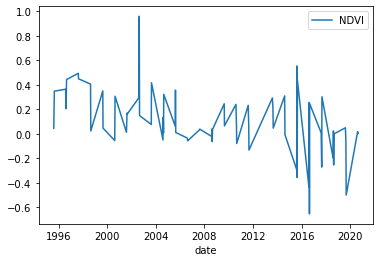

In [99]:
pd.DataFrame(data).plot(x="date", y="NDVI")
df.to_csv("1996Blue_NDVI.csv") # export the data to run analysis against sea level rise data in R

The plot above shows the vegetation's NDVI values extracted from the blue ROI site, in the Jamaica Bay location, in August of each year that a sattilte image was captured.Repeat this process to collect NDVI data from all nine ROI sites and conduct data analysis in R.


### Calculate the pixel area of NDVI values greater than or equal to 0.2

The color image analysis visually revealed the disappearance of marsh vegetation density in specific locations throughout Queens and Long Island’s South Bay from 1996 to 2019.

The purpose of this final calculation is to estimate the area of vegetation lost over time by using a calculation that analyzes for the pixel area of NDVI values greater than or equal to 0.2 in the color composite image. 


First, to make the NDVI >0.2 area calculation create this ROI first

In [112]:
LI_South_shore1 = ee.Geometry.Polygon( 
        [[[-73.77572570680367, 40.62687996780843],
          [-73.82447753785836, 40.64720135599994],
          [-73.85125671266304, 40.65293191118141],
          [-73.86087027510511, 40.65397407634329],
          [-73.8704827868818, 40.6456383919053],
          [-73.90104112819442, 40.62453326504267],
          [-73.89176879762398, 40.612807691053284],
          [-73.94052062867867, 40.60733433841584],
          [-73.91837120780038, 40.58856524878326],
          [-73.89760528444039, 40.575527899039805],
          [-73.85057006715523, 40.583089816778475],
          [-73.8210443103193, 40.59039016763608],
          [-73.80113159059273, 40.5997751620662],
          [-73.78602538942086, 40.59612559854807],
          [-73.7166741931318, 40.59351864548531],
          [-73.69504494664612, 40.59013160144696],
          [-73.67204223512398, 40.59404004422967],
          [-73.6342767321943, 40.59560421606736],
          [-73.5793450915693, 40.595082829520706],
          [-73.53951965211617, 40.59768972159454],
          [-73.4866479480146, 40.60003583755091],
          [-73.46021288465478, 40.60551009289637],
          [-73.4560924566063, 40.60954984801302],
          [-73.44596420167672, 40.610950710942525],
          [-73.43214552676424, 40.61200950125445],
          [-73.41420684694039, 40.617889688510765],
          [-73.38983132267947, 40.62486062808805],
          [-73.37111984132515, 40.62818280644402],
          [-73.33558593629586, 40.64094928000345],
          [-73.29507385133492, 40.641991333339256],
          [-73.27138504360548, 40.64212399655092],
          [-73.2475236499189, 40.64277286266537],
          [-73.17216430543648, 40.65189002866169],
          [-73.18040405153023, 40.67116222169769],
          [-73.31704650758492, 40.67689071878646],
          [-73.38845764039742, 40.656578371883754],
          [-73.47222839235054, 40.64772233589738],
          [-73.49076782106148, 40.65241097195515],
          [-73.51136718629586, 40.650327174378454]]]);



Map.setCenter(-73.4766, 40.7759, 10)   
Map.addLayer(LI_South_shore1, {"color": "#d6c938"})

Map.addLayerControl()

Map
Map;

![image](./GEEMap3.JPG)

In [101]:
area_1996 = ndvi_96.gte(0.2).selfMask() \
                            .multiply(ee.Image.pixelArea()).rename('Area') \
                            .reduceRegion(reducer=ee.Reducer.sum(),
                                          geometry=LI_South_shore1,
                                          scale=30,
                                          maxPixels=1e9)


print('Area 1996:', area_1996.get('Area').getInfo())

area_2000 = ndvi00.gte(0.2).selfMask() \
                            .multiply(ee.Image.pixelArea()).rename('Area') \
                            .reduceRegion(**{'reducer':ee.Reducer.sum(),
                                          'geometry':LI_South_shore1,
                                          'scale':30,
                                          'maxPixels':1e9
                                          })

print('Area 2000:', area_2000.get('Area').getInfo())

area_2019 = ndvi19.gte(0.2).selfMask() \
                            .multiply(ee.Image.pixelArea()).rename('Area') \
                            .reduceRegion(**{'reducer':ee.Reducer.sum(),
                                          'geometry':LI_South_shore1,
                                          'scale':30,
                                          'maxPixels':1e9
                                          })

print('Area 2019:', area_2019.get('Area').getInfo())

Area 1996: 124389670.90133965
Area 2000: 121843752.27802137
Area 2019: 117539029.68978551


#### Results Interpretation

The results of this calculation returned the pixel area containing a NDVI value above 0.2 for the 1996 image,the 2000 image and the 2019 image that make up the color composite image.

After converting the resulting pixel area into kilometers it was found that marshes lost vegetation density at a rate of 0.06 km2/year (15 acres/ year). 
Between 1996 and 2000 and .3 km2/ year (74 acres per /year) between 1996 and 2019. 